# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Keshin Ryandy
- **Email:** m180b4ky2178@bangkit.academy
- **ID Dicoding:** sinnnajabang

## Menentukan Pertanyaan Bisnis

- Kategori apa yang paling banyak dipesan?
- Pada periode kapan jumlah pesanan paling banyak?
- Type Pembayaran apa yang paling banyak digunakan?
- Dari States mana Customers berasal?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [10]:
customers_df = pd.read_csv(r'E-Commerce Public Dataset/customers_dataset.csv')
geolocation_df = pd.read_csv(r'E-Commerce Public Dataset/geolocation_dataset.csv')
order_items_df = pd.read_csv(r'E-Commerce Public Dataset/order_items_dataset.csv')
order_payments_df = pd.read_csv(r'E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews_df = pd.read_csv(r'E-Commerce Public Dataset/order_reviews_dataset.csv')
order_df = pd.read_csv(r'E-Commerce Public Dataset/orders_dataset.csv')
products_df = pd.read_csv(r'E-Commerce Public Dataset/products_dataset.csv')
sellers_df = pd.read_csv(r'E-Commerce Public Dataset/sellers_dataset.csv')


**Insight:**
- Menginisiasi semua data

### Assessing Data

In [11]:
customers_df.info()
print("jumlah Duplikasi = ", customers_df.duplicated().sum())
customers_df.describe()
geolocation_df.info()
geolocation_df.duplicated().sum()
geolocation_df.describe()
order_items_df.info()
order_items_df.duplicated().sum()
order_items_df.describe()
order_payments_df.info()
order_payments_df.duplicated().sum()
order_payments_df.describe()
order_reviews_df.info()
order_reviews_df[order_reviews_df.review_comment_title.isna()]
order_reviews_df.review_comment_title.value_counts()
order_reviews_df.review_comment_message.value_counts()
order_reviews_df.duplicated().sum()
order_reviews_df.info()
order_reviews_df.describe()
order_df.info()
order_df.describe()
order_df.order_approved_at.value_counts()
order_df[order_df.order_approved_at.isna()]
order_df.info()
products_df.info()
products_df[products_df.product_category_name.isna()]
products_df.product_id.duplicated().sum()
products_df[products_df.product_height_cm.isna()]
products_df.info()
sellers_df.info()
sellers_df.duplicated().sum()
sellers_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
jumlah Duplikasi =  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city         

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [12]:
geolocation_df.drop_duplicates(inplace=True)
order_reviews_df['review_comment_title'].fillna('Recomendo', inplace=True)
order_reviews_df['review_comment_message'].fillna('Muito Bom', inplace=True)
order_reviews_df.review_comment_message.replace("bom", "Bom", inplace=True)
order_reviews_df.review_comment_message.replace("otimo", "Otimo", inplace=True)
order_reviews_df.review_comment_message.replace("Ótimo", "Otimo", inplace=True)
order_reviews_df.review_comment_title.replace("recomendo", "Recomendo", inplace=True)
order_df.dropna(axis=0, inplace=True)
products_df.dropna(axis=0, inplace=True)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
#Kita mengelompokkan Seluruh data terlebih dahulu agar bisa melihat kesesuaian dataset satu dengan yang lain dan untuk mendeteksi sebarapa banyak missing value pada data 
all_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id",
)
all_df = pd.merge(
    left=all_df,
    right=order_reviews_df,
    how="left",
    on="order_id",
)
all_df = pd.merge(
    left=all_df,
    right=order_df,
    how="left",
    on="order_id",
)
all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    on="customer_id",
)
all_df = pd.merge(
    left=all_df,
    right=order_payments_df,
    how="left",
    on="order_id",
)
all_df = pd.merge(
    left=all_df,
    right=sellers_df,
    how="left",
    on="seller_id",
)
all_df.info()
all_df.dropna(inplace=True)
all_df.groupby(by ="product_category_name").product_id.nunique().sort_values(ascending=False)
product_english_pd = pd.read_csv(r'E-Commerce Public Dataset/product_category_name_translation.csv')
all_df['product_category_name'] = all_df['product_category_name'].map(product_english_pd.set_index('product_category_name')['product_category_name_english'])
all_df.groupby(by ="product_category_name").product_id.nunique().sort_values(ascending=False)
all_df['product_category_name'] = (
    all_df['product_category_name']
    .str.replace('_', ' ')  # Replacing underscores with spaces
    .str.title() # Capitalizing the first letter of each word
)
# Menghitung jumlah pesanan per tanggal
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
orders_by_date = all_df.groupby(all_df['order_purchase_timestamp'].dt.date).size()



# Sorting the most commonly used payment types
all_df['payment_type'] = (
    all_df['payment_type']
    .str.replace('_', ' ')  # Replacing underscores with spaces
    .str.title()  # Capitalizing the first letter of each word
)

payment_summary = all_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

#Mengelompokkan asal State Customers
state_summary = all_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name          116600 non-null  object 
 8   product_name_lenght            116600 non-null  float64
 9   product_description_lenght     116600 non-null  float64
 10  product_photos_qty             116600 non-null  float64
 11  product_weight_g               116600 non-null  float64
 12  product_length_cm             

**Insight:**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori apa yang paling banyak dipesan?

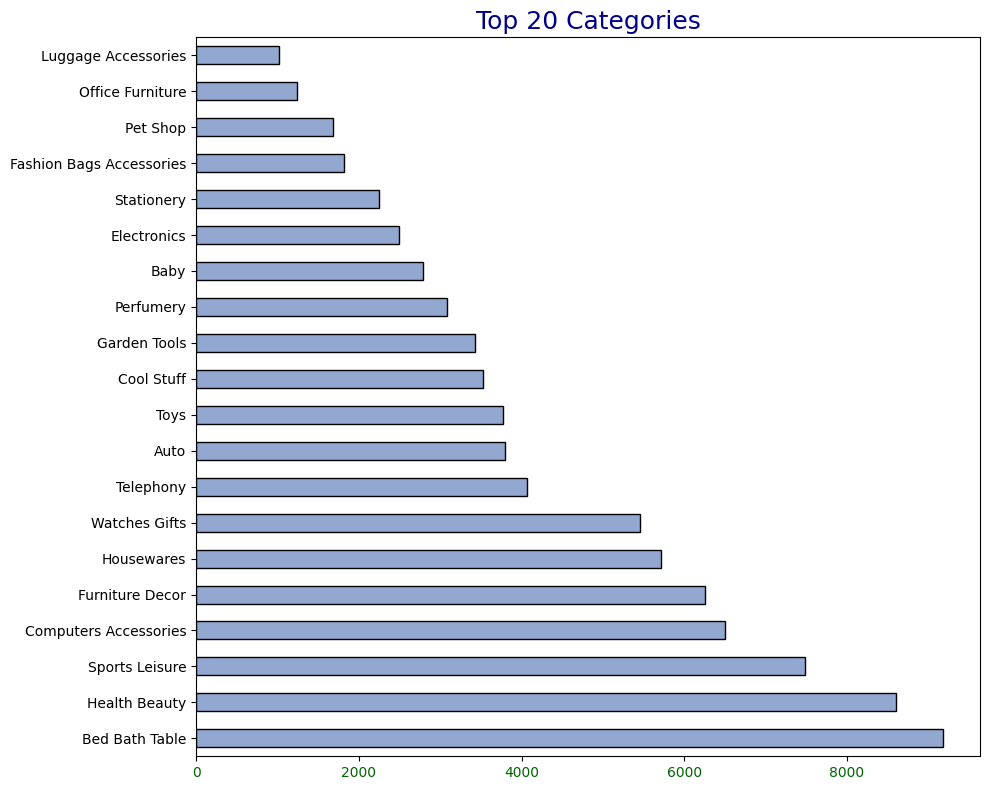

In [14]:
# Grouping data and counting unique order IDs for the top 20 categories
category_summary = all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 8)) 
category_summary.plot(kind='barh', color='#92A8D1', edgecolor='black')
plt.title('Top 20 Categories', fontsize=18, color="darkblue")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(color="darkgreen")
plt.tight_layout()  
plt.show()

### Pertanyaan 2: Pada periode kapan jumlah pesanan paling banyak?

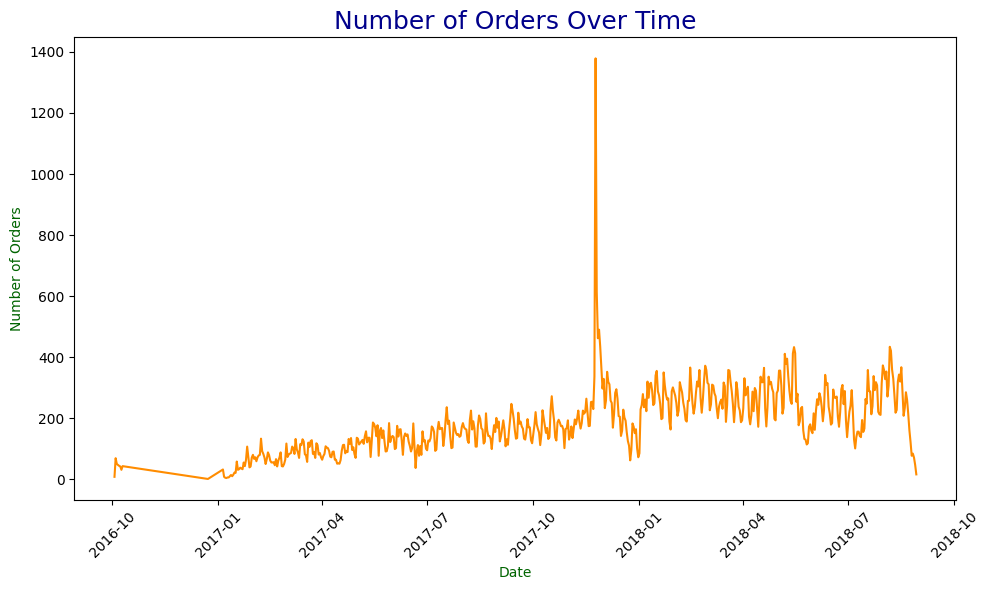

In [15]:
plt.figure(figsize=(10, 6))  
orders_by_date.plot(kind='line', color='darkorange')
plt.title('Number of Orders Over Time', fontsize=18, color="darkblue")
plt.xlabel('Date', color="darkgreen")
plt.ylabel('Number of Orders', color="darkgreen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Jawaban untuk pertanyaan 3 dan 4, dan ada analisis RTF)

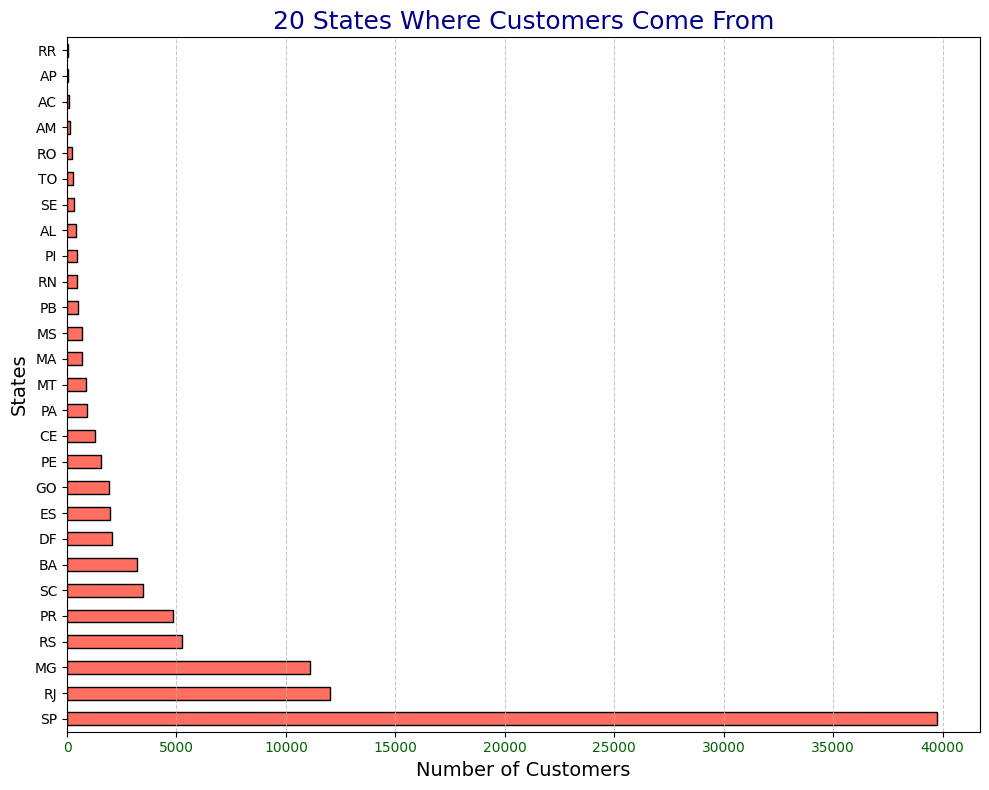

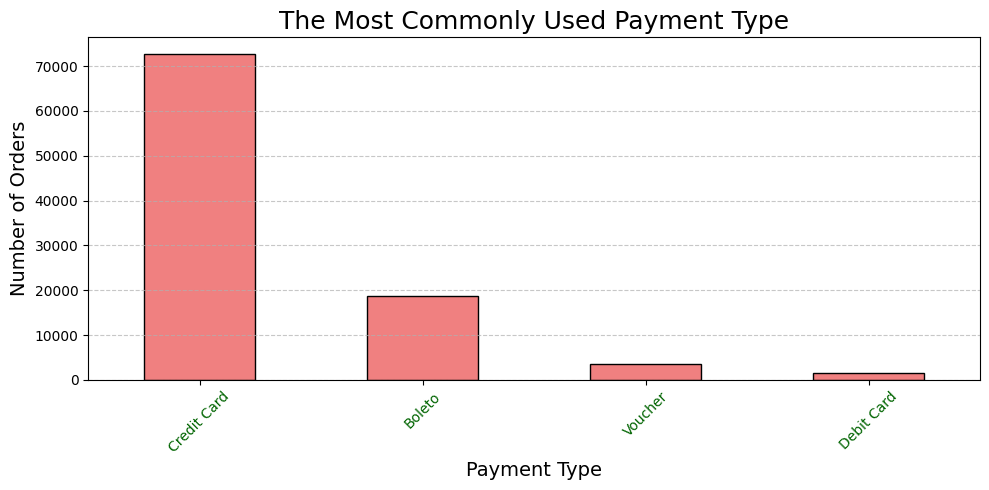

C:\Users\HP\AppData\Local\Temp\ipykernel_23568\359709618.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id_last3", data=rfm_df.sort_values(by="recency", ascending=True).head(5),
C:\Users\HP\AppData\Local\Temp\ipykernel_23568\359709618.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id_last3", data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
C:\Users\HP\AppData\Local\Temp\ipykernel_23568\359709618.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", 

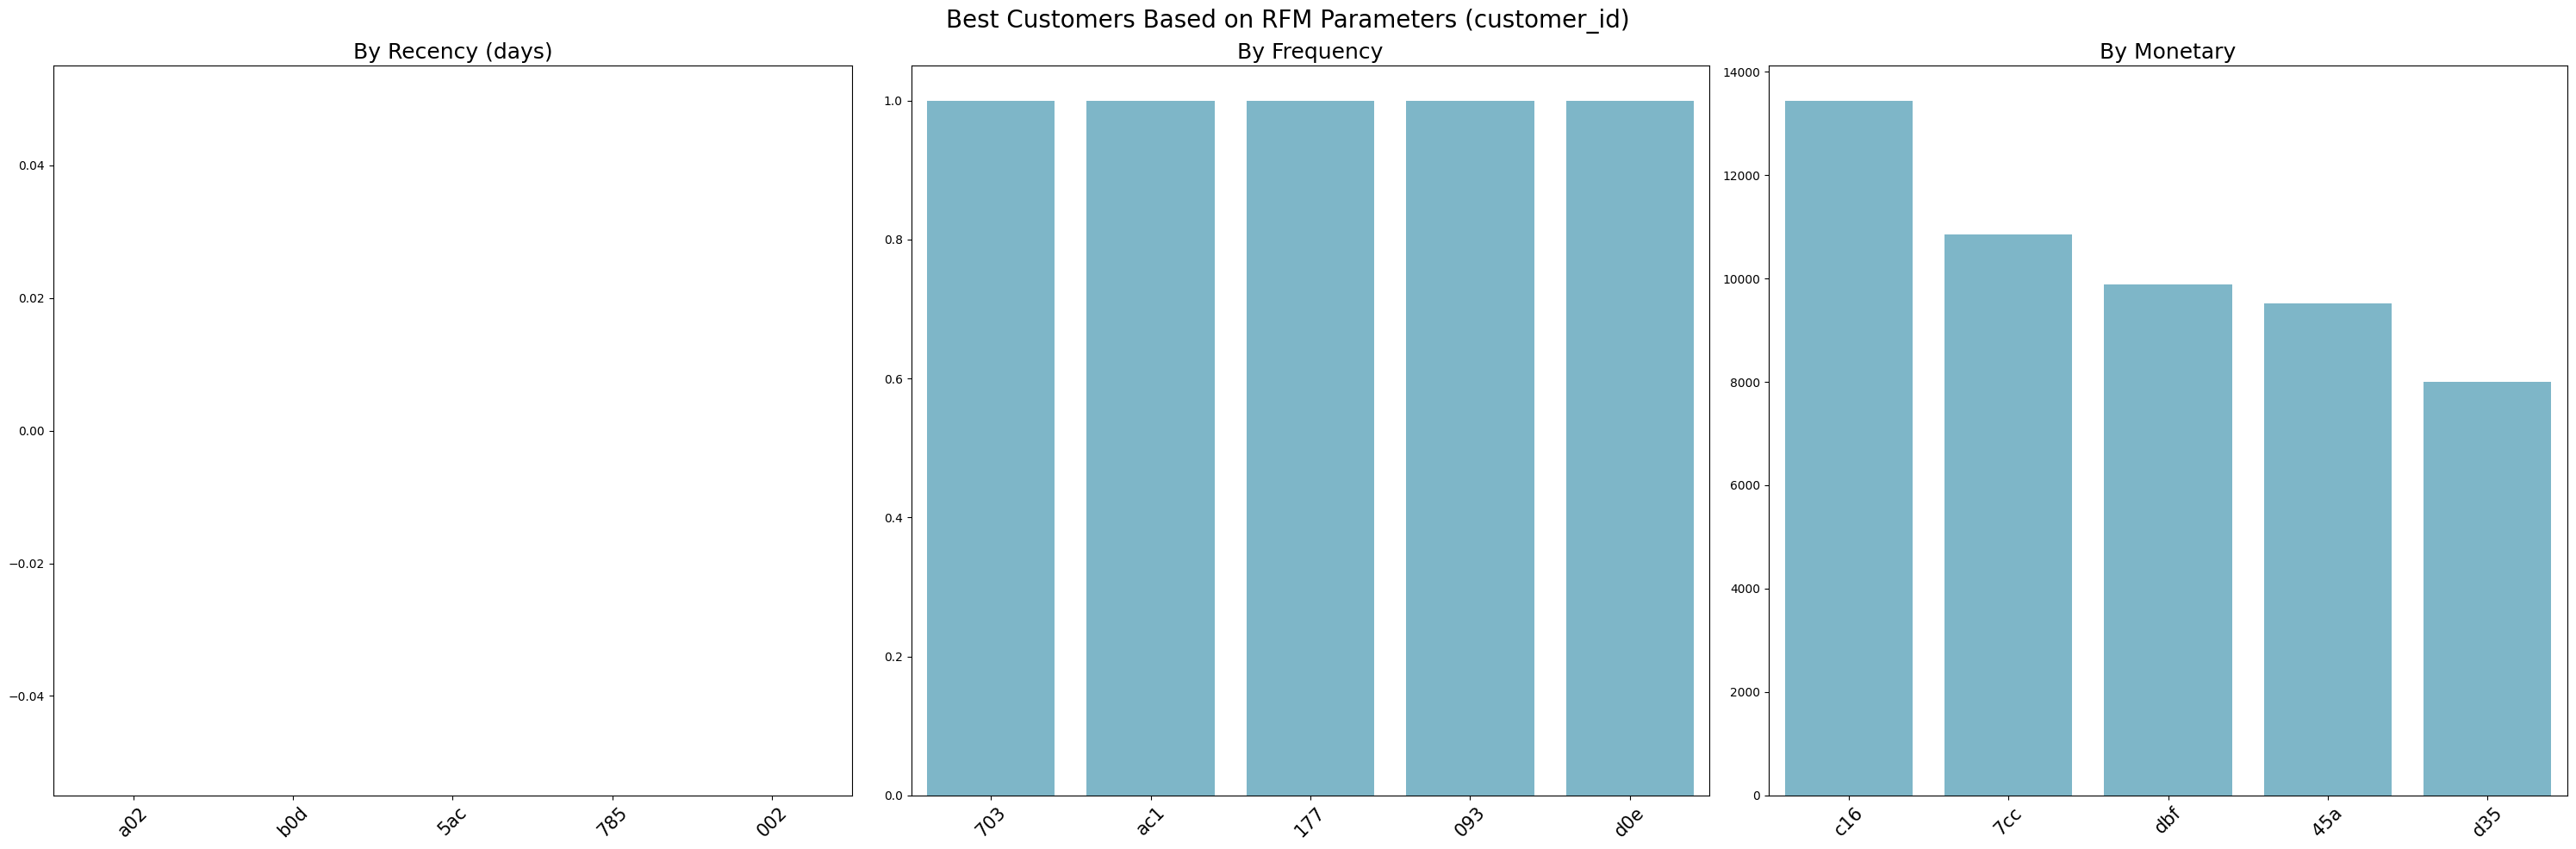

In [16]:
# Grouping by the state where customers are from
plt.figure(figsize=(10, 8))  # Setting figure size
state_summary.plot(kind='barh', color='#FF6F61', edgecolor='black')
plt.title('20 States Where Customers Come From', fontsize=18, color="darkblue")
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.xticks(color="darkgreen")
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding horizontal grid
plt.tight_layout() 
plt.show()


fig_payment, ax_payment = plt.subplots(figsize=(10, 5))
payment_summary.plot(kind='bar', color='lightcoral', edgecolor='black', ax=ax_payment)
plt.title('The Most Commonly Used Payment Type', fontsize=18)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding vertical grid
plt.tight_layout() 
plt.show()


# Grouping data by 'customer_id'
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Taking the last order date
    "order_id": "nunique",  # Counting the number of orders
    "price": "sum"  # Calculating the total revenue generated
})

# Renaming columns for easier usage
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'], errors='coerce')
# Calculating when the last transaction occurred (in days)
# Getting the latest date in the dataset
recent_date = all_df["order_purchase_timestamp"].dt.date.max()

# Calculating recency (number of days since the last transaction)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

# Dropping the 'max_order_timestamp' column
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Displaying the RFM data
rfm_df.head()
rfm_df['customer_id_last3'] = rfm_df['customer_id'].astype(str).str[-3:]
fig_rfm, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.subplots_adjust(wspace=0.4)

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot 1: By Recency
sns.barplot(y="recency", x="customer_id_last3", data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            palette=colors, hue=None, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)  # Rotate x-axis labels

# Plot 2: By Frequency
sns.barplot(y="frequency", x="customer_id_last3", data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            palette=colors, hue=None, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)  # Rotate x-axis labels

# Plot 3: By Monetary
sns.barplot(y="monetary", x="customer_id_last3", data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            palette=colors, hue=None, legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)  # Rotate x-axis labels

plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()

# Saving the dataframe to a CSV file
all_df.to_csv("main_data.csv", index=False)


## Conclusion

- Kategori yang paling banyak dipesan adalah Bed Bath Table dengan perbedaan yang cukup jauh, oleh karena itu perlu dipromosikan produk lainnya 
- Performa E-Commerce cukup bagus dengan yang terlihat pada grafik dengan grafik yang cenderung naik
- lebih darti 50% dari customers menggunakan metode Pembayaran yang  credit card , selain itu mayoritas customers berasal dari SP